# <ins>Data Analysis on my own Netflix Data</ins>

  For this project, I conducted an analysis of my personal Netflix data, focusing specifically on the "Viewing Activity" dataset provided by Netflix.

My first step in the project was to carefully examine and clean the dataset, ensuring that it was free of any missing or irrelevant information that could compromise the accuracy and completeness of my analysis.

With a clean dataset, I proceeded to explore and answer some pertinent questions, such as "What are my top shows?" and "What time of the day do I watch the most?" Using advanced data analysis techniques, I examined the data and generated visual representations of my findings using Seaborn, a powerful graphing tool. This allowed me to identify key patterns and trends within the dataset, and gain valuable insights into my personal viewing habits on the platform.

This project provided an exciting opportunity to apply advanced data analysis skills to real-world data, and to gain a deeper understanding of my own behavior as a user of the popular streaming platform.

In [1]:
#dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing my netflix account data 
netflix = pd.read_csv('ViewingActivity.csv')

In [3]:
#understanding the shape of the dataset
netflix.shape

(11287, 10)

In [4]:
#checking how the data looks
netflix.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Dennis,2023-02-19 19:02:30,00:04:29,NaN,"Love, Death & Robots: Volume 3: Night of the M...",NaN,Chrome PC (Cadmium),00:05:18,00:05:18,US (United States)
1,Dennis,2023-01-20 05:27:25,00:06:58,NaN,Smiley: Season 1: When Alex Met Bruno (Episode 1),NaN,Chrome PC (Cadmium),00:07:01,00:07:01,US (United States)
2,Dennis,2022-12-31 03:55:34,00:02:07,NaN,Big Mouth: Season 6: The Hookup House (Episode 1),NaN,Chrome PC (Cadmium),00:02:17,00:02:17,US (United States)
3,Dennis,2022-12-26 21:34:38,02:11:18,NaN,Glass Onion: A Knives Out Mystery,NaN,Chrome PC (Cadmium),02:12:44,02:12:44,US (United States)
4,Dennis,2022-12-19 04:14:22,00:00:36,NaN,Single’s Inferno: Season 2: Episode 1,NaN,Chrome PC (Cadmium),00:00:36,00:00:36,US (United States)


In [5]:
netflix.tail()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
11282,Dennis,2013-07-18 20:13:18,00:17:24,NaN,The Walking Dead: Season 1: Days Gone Bye (Epi...,NaN,Apple iPhone 5 with CDMA,00:29:48,Not latest view,US (United States)
11283,Dennis,2013-07-18 19:59:50,00:12:22,NaN,The Walking Dead: Season 1: Days Gone Bye (Epi...,NaN,Apple iPhone 5 with CDMA,00:12:22,Not latest view,US (United States)
11284,Dennis,2013-07-18 19:59:03,00:00:11,NaN,The Walking Dead: Season 1: Days Gone Bye (Epi...,NaN,Apple iPhone 5 with CDMA,00:00:11,Not latest view,US (United States)
11285,Dennis,2013-07-18 03:07:39,01:48:32,NaN,White Chicks,NaN,Samsung 2013 MStar X12 Smart TV,01:49:14,Not latest view,US (United States)
11286,Dennis,2013-07-18 02:49:21,00:17:47,NaN,The Avengers,NaN,Samsung 2013 MStar X12 Smart TV,00:17:48,Not latest view,US (United States)


In [6]:
#understanding what columns is present in the dataset
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11287 entries, 0 to 11286
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             11287 non-null  object
 1   Start Time               11287 non-null  object
 2   Duration                 11287 non-null  object
 3   Attributes               1917 non-null   object
 4   Title                    11287 non-null  object
 5   Supplemental Video Type  1 non-null      object
 6   Device Type              11287 non-null  object
 7   Bookmark                 11287 non-null  object
 8   Latest Bookmark          11287 non-null  object
 9   Country                  11287 non-null  object
dtypes: object(10)
memory usage: 881.9+ KB


# <ins>Cleaning the Data</ins>

In [7]:
#start cleaning the data by removing unnessary columns
netflix = netflix.drop(['Profile Name', 'Attributes','Supplemental Video Type','Bookmark','Latest Bookmark'], axis=1)
netflix.head()

,Start Time,Duration,Title,Device Type,Country
0,2023-02-19 19:02:30,00:04:29,"Love, Death & Robots: Volume 3: Night of the M...",Chrome PC (Cadmium),US (United States)
1,2023-01-20 05:27:25,00:06:58,Smiley: Season 1: When Alex Met Bruno (Episode 1),Chrome PC (Cadmium),US (United States)
2,2022-12-31 03:55:34,00:02:07,Big Mouth: Season 6: The Hookup House (Episode 1),Chrome PC (Cadmium),US (United States)
3,2022-12-26 21:34:38,02:11:18,Glass Onion: A Knives Out Mystery,Chrome PC (Cadmium),US (United States)
4,2022-12-19 04:14:22,00:00:36,Single’s Inferno: Season 2: Episode 1,Chrome PC (Cadmium),US (United States)


In [8]:
#checking if any data is missing
netflix.isnull().sum()

Start Time     0
Duration       0
Title          0
Device Type    0
Country        0
dtype: int64

In [9]:
#checking if any data are duplicates
netflix.duplicated().sum()

0

In [10]:
#START TIME is an object and we dont want that for caluculations so im going to change into datetime
netflix['Start Time'] = pd.to_datetime(netflix['Start Time'], utc=True)
netflix.dtypes

Start Time     datetime64[ns, UTC]
Duration                    object
Title                       object
Device Type                 object
Country                     object
dtype: object

In [11]:
# first im going change the START TIME column into the data's index
netflix = netflix.set_index('Start Time')
# then im going to convert from UTC timezone to pacific time because that's where im from
netflix.index = netflix.index.tz_convert('US/Pacific')
#lastly im going to reset the index so that START TIME becomes a column again
netflix = netflix.reset_index()
#check if it worked
netflix.head(3)

,Start Time,Duration,Title,Device Type,Country
0,2023-02-19 11:02:30-08:00,00:04:29,"Love, Death & Robots: Volume 3: Night of the M...",Chrome PC (Cadmium),US (United States)
1,2023-01-19 21:27:25-08:00,00:06:58,Smiley: Season 1: When Alex Met Bruno (Episode 1),Chrome PC (Cadmium),US (United States)
2,2022-12-30 19:55:34-08:00,00:02:07,Big Mouth: Season 6: The Hookup House (Episode 1),Chrome PC (Cadmium),US (United States)


In [12]:
#DURATION is also an object so im going to change it timedelta for calculations
netflix['Duration'] = pd.to_timedelta(netflix['Duration'])
netflix.dtypes
netflix.head(6)

,Start Time,Duration,Title,Device Type,Country
0,2023-02-19 11:02:30-08:00,0 days 00:04:29,"Love, Death & Robots: Volume 3: Night of the M...",Chrome PC (Cadmium),US (United States)
1,2023-01-19 21:27:25-08:00,0 days 00:06:58,Smiley: Season 1: When Alex Met Bruno (Episode 1),Chrome PC (Cadmium),US (United States)
2,2022-12-30 19:55:34-08:00,0 days 00:02:07,Big Mouth: Season 6: The Hookup House (Episode 1),Chrome PC (Cadmium),US (United States)
3,2022-12-26 13:34:38-08:00,0 days 02:11:18,Glass Onion: A Knives Out Mystery,Chrome PC (Cadmium),US (United States)
4,2022-12-18 20:14:22-08:00,0 days 00:00:36,Single’s Inferno: Season 2: Episode 1,Chrome PC (Cadmium),US (United States)
5,2022-11-30 19:35:10-08:00,0 days 00:25:48,Wednesday: Season 1: Wednesday's Child Is Full...,Chrome PC (Cadmium),US (United States)


In [13]:
#TITLE includes Season X: Episode Y and i dont need that for my calculations today so im going to get rid of them 
netflix['Title'] = netflix['Title'].str.split(':').str[0]
netflix.head(6)

,Start Time,Duration,Title,Device Type,Country
0,2023-02-19 11:02:30-08:00,0 days 00:04:29,"Love, Death & Robots",Chrome PC (Cadmium),US (United States)
1,2023-01-19 21:27:25-08:00,0 days 00:06:58,Smiley,Chrome PC (Cadmium),US (United States)
2,2022-12-30 19:55:34-08:00,0 days 00:02:07,Big Mouth,Chrome PC (Cadmium),US (United States)
3,2022-12-26 13:34:38-08:00,0 days 02:11:18,Glass Onion,Chrome PC (Cadmium),US (United States)
4,2022-12-18 20:14:22-08:00,0 days 00:00:36,Single’s Inferno,Chrome PC (Cadmium),US (United States)
5,2022-11-30 19:35:10-08:00,0 days 00:25:48,Wednesday,Chrome PC (Cadmium),US (United States)


In [14]:
#Im adding weekday and hour to my data
netflix['weekday'] = netflix['Start Time'].dt.weekday
netflix['hour'] = netflix['Start Time'].dt.hour
netflix.head(3)

,Start Time,Duration,Title,Device Type,Country,weekday,hour
0,2023-02-19 11:02:30-08:00,0 days 00:04:29,"Love, Death & Robots",Chrome PC (Cadmium),US (United States),6,11
1,2023-01-19 21:27:25-08:00,0 days 00:06:58,Smiley,Chrome PC (Cadmium),US (United States),3,21
2,2022-12-30 19:55:34-08:00,0 days 00:02:07,Big Mouth,Chrome PC (Cadmium),US (United States),4,19


# <ins>Data Analysis</ins>

### What is the total amount of time that I have watch netflix?

In [15]:
netflix['Duration'].sum()

Timedelta('145 days 20:50:19')

I have spent almost **146 DAYS** of my life watching Netflix. 

### What Days do I watch Netflix the most and least?

In [16]:
#Making a new df to calculate how many times i have clicked on a specific on a day
netflix['weekday'] = pd.Categorical(netflix['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)
value_counts_day = netflix['weekday'].value_counts()
value_counts_day = value_counts_day.sort_index()
netflix_day = pd.DataFrame(value_counts_day)
# netflix_day = netflix_day.set_index("Days", inplace=True)
netflix_day.columns = ['Amount']
netflix_day.index = netflix_day.index.rename_categories(['Monday','Tuesday','Wednesday','Thrusday',
                                                         'Friday','Saturday','Sunday'])

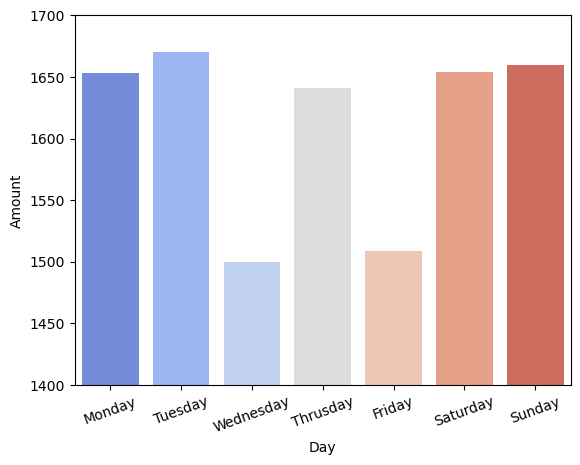

In [17]:
#Making a bar graph for the df netflix_day on the amount of times i have clicked onb each day
daygraph = sns.barplot(data=netflix_day, x=netflix_day.index, y=netflix_day.Amount, palette = 'coolwarm')
#I changed the lower limit of y to 1400 because the data looked almost the same if I didnt. I wanted to show it zoomed in on it to show the differences.
daygraph.set(ylim=(1400,1700))
daygraph.set(xlabel='Day', ylabel='Amount')
daygraph.set_xticklabels(netflix_day.index, rotation=20);

It looks like I watch Netflix the most on a **Tuesday** and the least on a **Wednesday**. I find that I barely watch tv on a **Friday** kind of weird eventhough the weekend is runner up on the most watched. Its possible that I go out more often on **Wednesday** and **Friday** thus the decrease in numbers but i dont have that data to back up my claim. 

### What Hours do I watch Netflix the most and least?

In [18]:
#Making a new df to calculate how many times i have clicked on a specific hour of the day
netflix['hour'] = pd.Categorical(netflix['hour'],categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)
value_counts_hour = netflix['hour'].value_counts()
value_counts_hour = value_counts_hour.sort_index()
netflix_hour = pd.DataFrame(value_counts_hour)
netflix_hour.columns = ['Amount']
netflix_hour.index = netflix_hour.index.rename_categories(['12 am','1 am','2 am','3 am',
'4 am','5 am','6 am','7 am','8 am','9 am','10 am','11 am','12 pm','1 pm','2 pm','3 pm',
'4 pm','5 pm','6 pm','7 pm','8 pm','9 pm','10 pm','11 pm',])

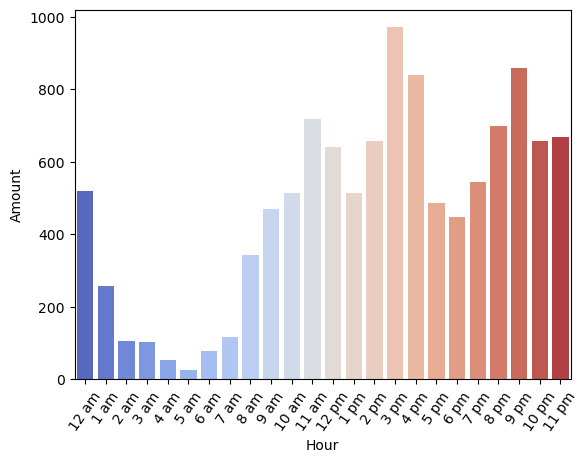

In [19]:
#Making a bar graph for the df netflix_day on the amount of times i have clicked on each hour
hourgraph = sns.barplot(data=netflix_hour, x=netflix_hour.index, y=netflix_hour.Amount, palette = 'coolwarm')
hourgraph.set(xlabel='Hour', ylabel='Amount')
hourgraph.set_xticklabels(netflix_hour.index, rotation=55);

The most watched hour is at **3pm** and the runner up is at **8pm**. This makes sense because during these times, I eat lunch and dinner. I do enjoy watching shows or movies while I eat if I eat at home. **5am** being my least watched hour makes sense because that when in my REM of my sleep cycle. 

### What are my top 10 shows that I have viewed on Netflix?

In [20]:
#New df on the most watched shows
sum_duration = netflix.groupby(['Title'])['Duration'].sum()
most_watched_shows = pd.DataFrame(sum_duration)
most_watched_shows = most_watched_shows.sort_values(by=['Duration'], ascending=False)
top_ten_watched = most_watched_shows.head(10)
top_ten_watched

,Duration
Title,
That '70s Show,12 days 20:20:12
Orange Is the New Black,7 days 21:43:30
The Office (U.S.),7 days 12:46:10
Breaking Bad,7 days 07:49:14
Friends,4 days 03:52:41
Parks and Recreation,3 days 06:35:36
Stranger Things,3 days 03:16:04
How I Met Your Mother,3 days 02:21:33
Person of Interest,3 days 02:13:56


In [21]:
top_ten_watched = top_ten_watched.assign(Duration = (top_ten_watched['Duration'].dt.total_seconds()/60))
top_ten_watched

,Duration
Title,
That '70s Show,18500.200000
Orange Is the New Black,11383.500000
The Office (U.S.),10846.166667
Breaking Bad,10549.233333
Friends,5992.683333
Parks and Recreation,4715.600000
Stranger Things,4516.066667
How I Met Your Mother,4461.550000
Person of Interest,4453.933333


In [22]:
top_ten_watched.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, That '70s Show to Gossip Girl
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  10 non-null     float64
dtypes: float64(1)
memory usage: 160.0+ bytes


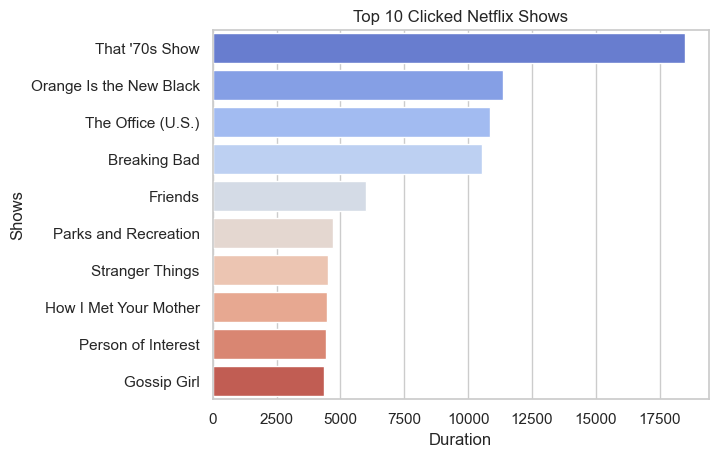

In [23]:
sns.set_theme(style="whitegrid")
top10watched = sns.barplot(x = top_ten_watched.Duration, y = top_ten_watched.index , data=top_ten_watched, palette='coolwarm')
top10watched.set(title = 'Top 10 Watched Netflix Shows', ylabel = 'Shows');

 The most watched show for me is **That 70s Show** by a far margin. The three runner ups are **Orange is the New Black**, **The Office(US)**, and **Breaking Bad**.

### What are my top 10 shows that I have clicked on Netflix?

In [24]:
#New df on the Shows I clicked on the most 
value_counts_clicked = netflix['Title'].value_counts()
top_clicked = pd.DataFrame(value_counts_clicked)
top_clicked.columns = ['Clicks']
top_clicked['Clicks'] = top_clicked['Clicks'].astype(str).astype(int)
top_ten_clicked = top_clicked.head(10)
top_ten_clicked

,Clicks
That '70s Show,1294
The Office (U.S.),796
Friends,468
Orange Is the New Black,433
Schitt's Creek,407
Breaking Bad,335
Parks and Recreation,328
Gilmore Girls,311
How I Met Your Mother,274
Archer,269


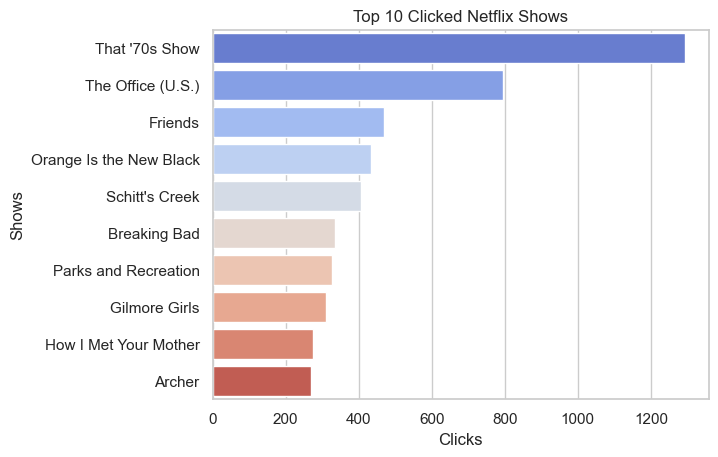

In [25]:
#Making a bar graph from the df top_ten_clicked
sns.set_theme(style="whitegrid")
top10click = sns.barplot(x = top_ten_clicked.Clicks, y = top_ten_clicked.index , data=top_ten_clicked, palette='coolwarm')
top10click.set(title = 'Top 10 Clicked Netflix Shows', ylabel = "Shows");



I am kind of surprised that **That 70's Show** is my mosted watched. I usually do not like rewatching shows but somehow, **That 70's Show** surpassed them all by quite a lot more than i expected. 

### What are the top 10 devices used to watched Netflix?

In [26]:
#Making devices its own df
devices = netflix['Device Type'].value_counts()
top_devices = pd.DataFrame(devices)
top_devices.columns = ['Used']
top_devices['Used'] = top_devices['Used'].astype(str).astype(int)
top_ten_devices = top_devices.head(10)
top_ten_devices

,Used
Chrome PC (Cadmium),3143
Roku 3 Set Top Box,2927
Apple iPhone 6,2172
Apple iPhone X (CDMA),1072
Apple iPhone 13 Pro Max,539
PC,423
Apple iPhone 5 with CDMA,371
Apple TV 3 (revised),353
Samsung 2013 MStar X12 Smart TV,192
Edge (Cadmium),52


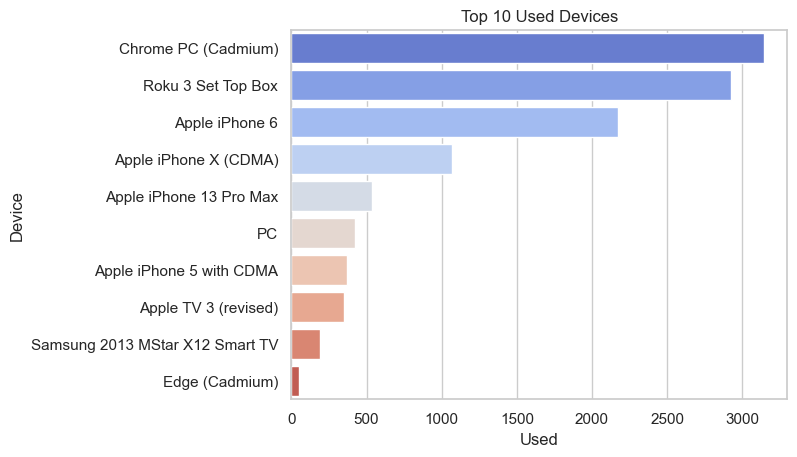

In [29]:
#Graphing the devices
sns.set_theme(style="whitegrid")
top10device = sns.barplot(x = top_ten_devices.Used, y = top_ten_devices.index , data=top_ten_devices, palette='coolwarm')
top10device.set(title = 'Top 10 Used Devices', ylabel = "Device");


I don't own a **Roku3**. My household is an **Amazon Firestick** home via my mom. I guess i shared my account with someone and they used my account to the fullest. 

### What countries I use netflix more?

In [27]:
netflix['Country'].value_counts()

US (United States)    11237
AU (Australia)           50
Name: Country, dtype: int64

I should travel more...

# <ins>Conclusion</ins>

Some ways that I could improve this project:   
    <ol>
      <li>Importing another dataset that includes genres of each show so i can find what genre i like the most.</li>
      <li>I could have seperate the movies with the shows to calculate that data</li>
      <li>Recording my life to compare my habits with netflix to show how each correlate to each other. </li>
      <li>ETC.</li>
    </ol>

Overall, this project has allowed me to gain insights into my own viewing habits and prefereneces, and gave me an oppurtunity to practice my data analysis skills such as data cleaning and visualization. It was a fun and insightful project that helped me better understand the data behind one of my favorite streaming platform. 